In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('house_price_prediction.csv')

data.head()

,Unnamed: 0,OverallQual,GrLivArea,TotalBsmtSF,YearBuilt,SalePrice
0,0,7,1710,856,2003,208500
1,1,6,1262,1262,1976,181500
2,2,7,1786,920,2001,223500
3,3,7,1717,756,1915,140000
4,4,8,2198,1145,2000,250000


In [17]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [18]:
data.head()

,OverallQual,GrLivArea,TotalBsmtSF,YearBuilt,SalePrice
0,7,1710,856,2003,208500
1,6,1262,1262,1976,181500
2,7,1786,920,2001,223500
3,7,1717,756,1915,140000
4,8,2198,1145,2000,250000


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   OverallQual  1338 non-null   int64
 1   GrLivArea    1338 non-null   int64
 2   TotalBsmtSF  1338 non-null   int64
 3   YearBuilt    1338 non-null   int64
 4   SalePrice    1338 non-null   int64
dtypes: int64(5)
memory usage: 52.4 KB


In [21]:
data.isna().sum()

OverallQual    0
GrLivArea      0
TotalBsmtSF    0
YearBuilt      0
SalePrice      0
dtype: int64

In [20]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
OverallQual,1338.0,6.219731,1.324472,2.0,5.00,6.0,7.0,10.0
GrLivArea,1338.0,1537.585202,520.579960,438.0,1160.00,1480.0,1791.5,5642.0
TotalBsmtSF,1338.0,1095.947683,405.554435,105.0,819.75,1021.5,1324.0,6110.0
YearBuilt,1338.0,1973.029148,29.563540,1880.0,1956.00,1976.0,2001.0,2010.0
SalePrice,1338.0,186761.782511,78913.847668,35311.0,135000.00,168500.0,220000.0,755000.0


In [19]:
data.corr()

,OverallQual,GrLivArea,TotalBsmtSF,YearBuilt,SalePrice
OverallQual,1.000000,0.594470,0.505897,0.570668,0.783546
GrLivArea,0.594470,1.000000,0.460778,0.189146,0.711706
TotalBsmtSF,0.505897,0.460778,1.000000,0.385146,0.602042
YearBuilt,0.570668,0.189146,0.385146,1.000000,0.504297
SalePrice,0.783546,0.711706,0.602042,0.504297,1.000000


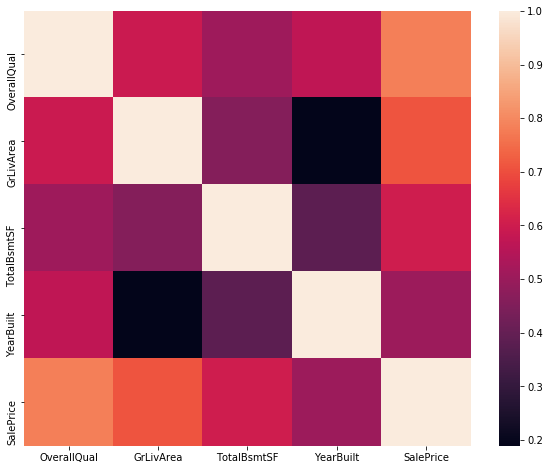

In [23]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr())

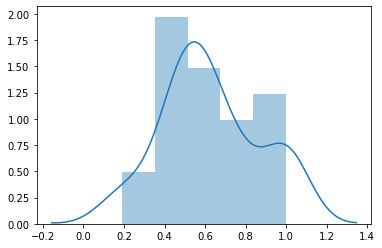

In [26]:
sns.distplot(data.corr())

In [27]:
X = data.iloc[:,:-1]
X.head()

,OverallQual,GrLivArea,TotalBsmtSF,YearBuilt
0,7,1710,856,2003
1,6,1262,1262,1976
2,7,1786,920,2001
3,7,1717,756,1915
4,8,2198,1145,2000


In [28]:
y = data.iloc[:,-1]
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [66]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [67]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [68]:
y_pred = lr.predict(X_test)

In [69]:
from sklearn.metrics import r2_score, mean_squared_error

In [70]:
print('Rsquare value : ', r2_score(y_test, y_pred))
print('RMSE value : ', np.sqrt(mean_squared_error(y_test, y_pred)))

Rsquare value :  0.7108931693459948
RMSE value :  41390.44383916552


In [71]:
unseen_pred = lr.predict(np.array([[7, 1710, 856, 2003]]))
unseen_pred

array([218909.45675857])

In [72]:
unseen_pred = lr.predict(np.array([[7, 1717, 756, 1915]]))
unseen_pred

array([185796.82793658])

In [73]:
import pickle

In [74]:
pickle.dump(lr, open('model.pkl', 'wb'))

__Client side__

In [75]:
model2 = pickle.load(open('model.pkl', 'rb'))

In [76]:
model2.predict([[7, 1717, 756, 1915]])[0]

185796.82793658355